## Wind Fields for altitudes 82-98km 

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Define Classes

In [2]:
class vortex(object):
    '''Vortex element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize vortex given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to vortex and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2 + 1e-1 # adding 1e-1 to avoid element to blow up to infinity 
        u = (self.C / (2 * np.pi)) * -y_rel / rsq
        v = (self.C / (2 * np.pi)) * x_rel / rsq
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [3]:
class sourcesink(object):
    '''Source/sink element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize source/sink given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to source/sink and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.x0
        rsq = x_rel**2 + y_rel**2 + 1e-1 # adding 1e-1 to avoid element to blow up to infinity 
        u = (self.C / (2 * np.pi)) * x_rel / rsq
        v = (self.C / (2* np.pi)) * y_rel / rsq
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [4]:
class uniform(object):
    '''Uniform flow element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize uniform flow given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        u = self.C * np.ones_like(x)
        v = self.C * np.ones_like(x)
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [5]:
class doublet(object):
    '''Power law with n = -1 in Az^n for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize doublet power law given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2 + 1e-1 # adding 1e-1 to avoid element to blow up to infinity 
        rev = y_rel**2 - x_rel**2
        u = (self.C * rev) / rsq**2
        v = (-self.C * 2 * x_rel * y_rel) / rsq**2
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [6]:
class hexagonal(object):
    '''Power law with n = 3 in Az^n element for the potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize hexagonal power law given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        u = 3 * rsq
        v = 6 * x_rel * y_rel
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

## Set Longitude and Latitude

In [7]:
x = np.arange(-75,-70,.01) # longitude
y = np.arange(40,45,.01)# latitude
X, Y = np.meshgrid(x,y)

In [8]:
z = np.array([82,84,86,88,90,92,94,96,98])

In [9]:
u3d = np.empty((len(x),len(y),len(z)), dtype = np.float_)
v3d = np.empty((len(x),len(y),len(z)), dtype = np.float_)

## Wind Field 1 ~ 82 km

In [10]:
vtx0 = vortex(165, -72.5, 43)
vtx1 = vortex(140, -73, 41)
uni = uniform(-10, -74.5, 42)
UV1 = vtx0(X,Y) + vtx1(X,Y) + uni(X,Y) 

In [11]:
u = UV1[...,0]
v = UV1[...,1]
speed = np.sqrt(u**2+v**2)

In [12]:
u3d[:,:,0] = u
v3d[:,:,0] = v

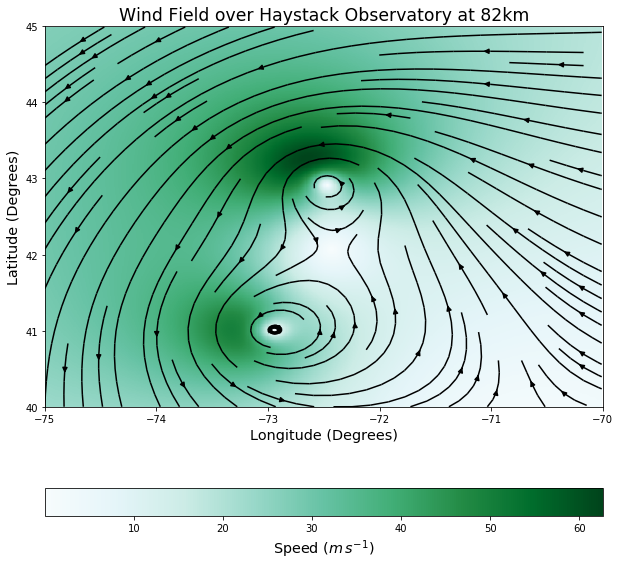

In [13]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory at 82km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.show()

In [14]:
np.amax(speed)

62.66014512756995

In [15]:
np.amin(speed)

0.014724410723226314

In [16]:
np.mean(speed)

25.623921689049364

## Wind Field 2 ~ 84 km

In [17]:
vtx0 = vortex(-215, -72, 43.4)
vtx1 = vortex(195, -73, 41)
src = sourcesink(110, -72, 44)
snk = sourcesink(145, -73.5, 42.5)
UV2 = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + snk(X,Y) 

In [18]:
u = UV2[...,0]
v = UV2[...,1]
speed = np.sqrt(u**2+v**2)

In [19]:
u3d[:,:,1] = u
v3d[:,:,1] = v

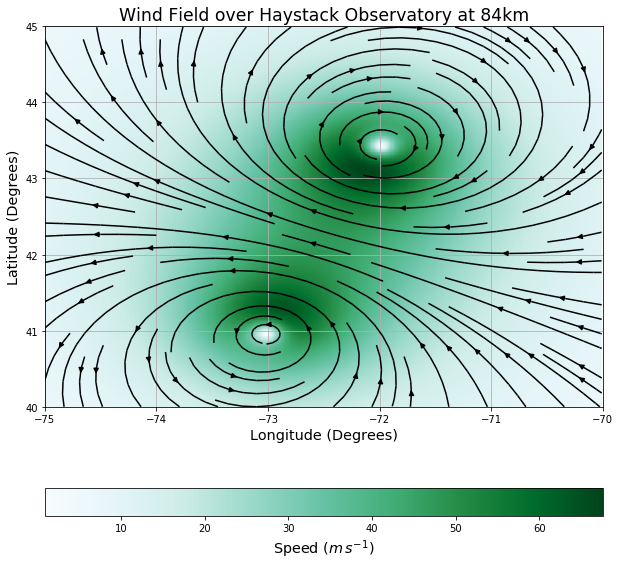

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory at 84km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [21]:
np.amax(speed)

67.60346415570807

In [22]:
np.amin(speed)

0.9025205795752504

In [23]:
np.mean(speed)

23.858034447977673

## Wind Field 3 ~ 86 km

In [24]:
vtx0 = vortex(170, -71, 43)
vtx1 = vortex(190, -74, 41)
src = sourcesink(100, -73, 42)
snk = sourcesink(-210, -72, 40)
dbt = doublet(-18, -74.5, 44)
uni = uniform(-11, -71, 42)
UV3 = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + snk(X,Y) + dbt(X,Y) + uni(X,Y) 

In [25]:
u = UV3[...,0]
v = UV3[...,1]
speed = np.sqrt(u**2+v**2)

In [26]:
u3d[:,:,2] = u
v3d[:,:,2] = v

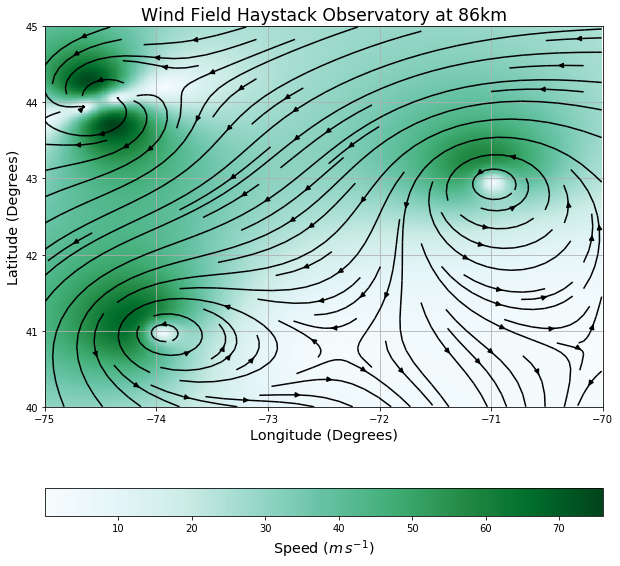

In [27]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap) 

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 86km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [28]:
np.amax(speed)

75.96838531306325

In [29]:
np.amin(speed)

0.012278906605377282

In [30]:
np.mean(speed)

27.1124737228344

## Wind Field 4 ~ 88 km

In [31]:
vtx0 = vortex(200, -72.6, 41)
vtx1 = vortex(185, -71, 43)
uni = uniform(21, -73.5, 42.5)
UV4 =  vtx0(X,Y) + vtx1(X,Y) + uni(X,Y)

In [32]:
u = UV4[...,0]
v = UV4[...,1]
speed = np.sqrt(u**2+v**2)

In [33]:
u3d[:,:,3] = u
v3d[:,:,3] = v

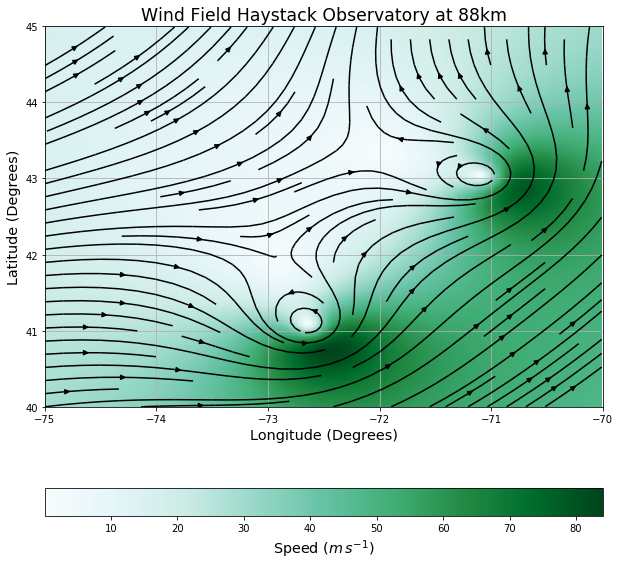

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 88km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [35]:
np.amax(speed)

84.0417105416222

In [36]:
np.amin(speed)

0.047539967620994765

In [37]:
np.mean(speed)

29.191649386775

## Wind Field 5 ~ 90 km

In [38]:
vtx0 = vortex(240, -71, 41)
vtx1 = vortex(-210, -74, 44)
src = sourcesink(105, -72.5, 42.5)
uni = uniform(25, -72, 44)
UV5 = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + uni(X,Y) 

In [39]:
u = UV5[...,0]
v = UV5[...,1]
speed = np.sqrt(u**2+v**2)

In [40]:
u3d[:,:,4] = u
v3d[:,:,4] = v

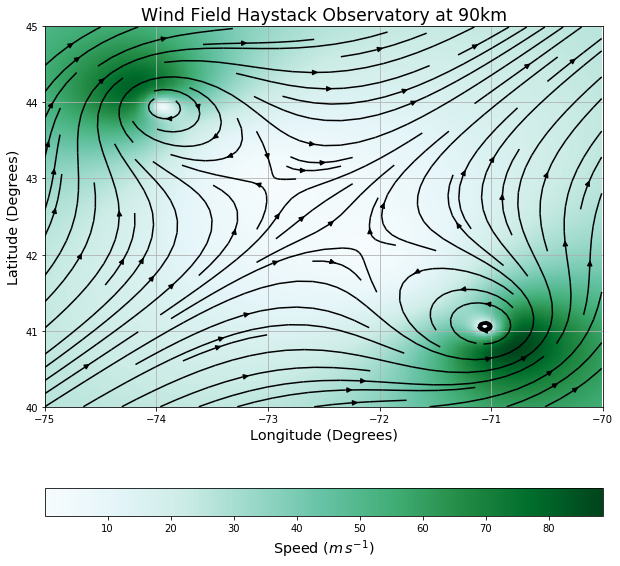

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 90km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [42]:
np.amax(speed)

88.5586280756571

In [43]:
np.amin(speed)

0.03414676082600294

In [44]:
np.mean(speed)

25.93319973383897

## Wind Field 6 ~ 92 km

In [45]:
vtx0 = vortex(250, -72, 41)
vtx1 = vortex(-270, -75, 43)
src = sourcesink(250, -72.5, 42.5)
dbt = doublet(-32, -72.5, 44)
uni = uniform(17, -72, 44)
UV6 = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + dbt(X,Y) + uni(X,Y) 

In [46]:
u = UV6[...,0]
v = UV6[...,1]
speed = np.sqrt(u**2+v**2)

In [47]:
u3d[:,:,5] = u
v3d[:,:,5] = v

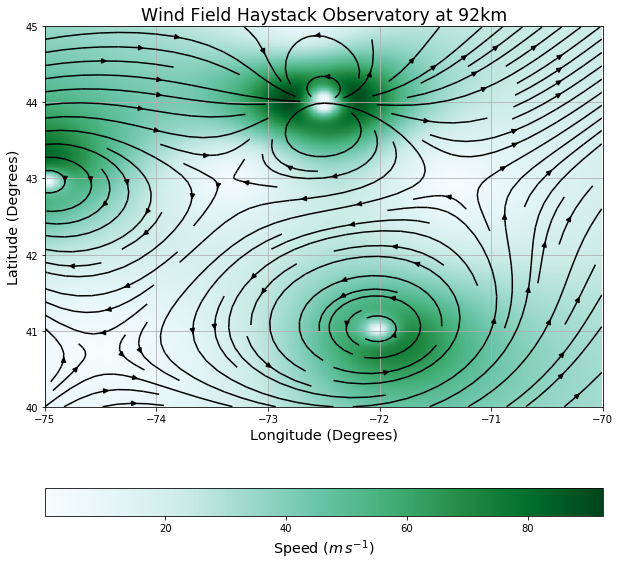

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 92km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [49]:
np.amax(speed)

92.4677361930383

In [50]:
np.amin(speed)

0.06506765149453057

In [51]:
np.mean(speed)

30.72671617320536

## Wind Field 7 ~ 94 km

In [52]:
vtx0 = vortex(290, -73, 41)
src = sourcesink(310, -71, 43.5)
dbt = doublet(21, -74, 44)
uni = uniform(15, -71, 44)
UV7 = vtx0(X,Y) + src(X,Y) + dbt(X,Y) + uni(X,Y)

In [53]:
u = UV7[...,0]
v = UV7[...,1]
speed = np.sqrt(u**2+v**2)

In [54]:
u3d[:,:,6] = u
v3d[:,:,6] = v

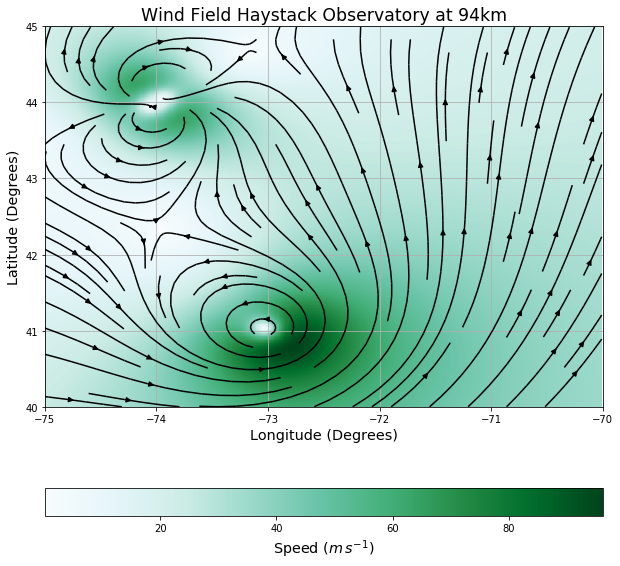

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 94km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [56]:
np.amax(speed)

96.23114871614

In [57]:
np.amin(speed)

0.10080544394059837

In [58]:
np.mean(speed)

31.79390400802337

## Wind Field 8 ~ 96 km

In [59]:
vtx0 = vortex(265, -74, 40.5)
vtx1 = vortex(225, -71.5, 44)
dbt = doublet(25, -70.5, 41)
uni = uniform(13, -70, 43)
UV8 = vtx0(X,Y) + vtx1(X,Y) + dbt(X,Y) + uni(X,Y)

In [60]:
u = UV8[...,0]
v = UV8[...,1]
speed = np.sqrt(u**2+v**2)

In [61]:
u3d[:,:,7] = u
v3d[:,:,7] = v

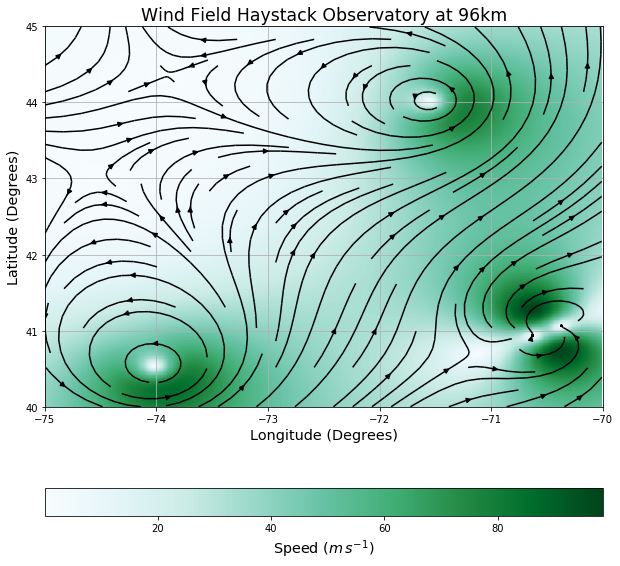

In [62]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 96km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [63]:
np.amax(speed)

98.58378591241939

In [64]:
np.amin(speed)

0.015343009846832137

In [65]:
np.mean(speed)

30.7341657895192

## Wind Field 9 ~ 98 km

In [66]:
vtx0 = vortex(290, -74, 40.5)
dbt = doublet(30, -70.5, 43)
src = sourcesink(200, -72.5, 42.5)
uni = uniform(15, -70, 43)
UV9 = vtx0(X,Y) + dbt(X,Y) + src(X,Y) + uni(X,Y)

In [67]:
u = UV9[...,0]
v = UV9[...,1]
speed = np.sqrt(u**2+v**2)

In [68]:
u3d[:,:,8] = u
v3d[:,:,8] = v

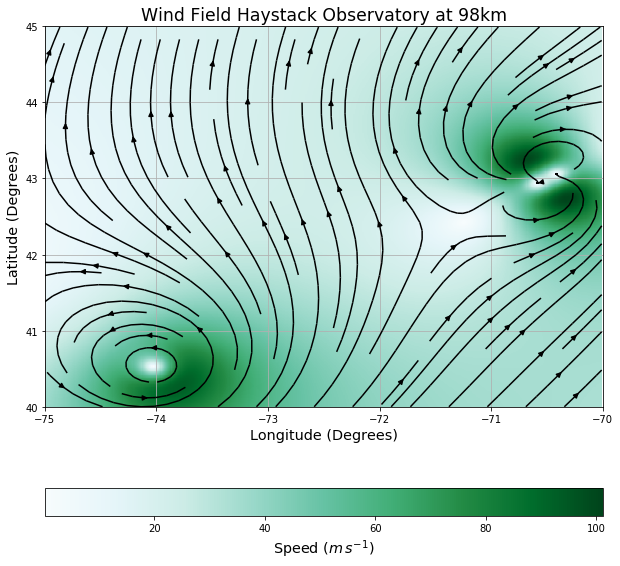

In [69]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field Haystack Observatory at 98km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [70]:
np.amax(speed)

101.15019628536322

In [71]:
np.amin(speed)

0.17360334637162075

In [72]:
np.mean(speed)

31.769862706433077

# Interpolation 

In [73]:
import h5py
with h5py.File('simulated_winds_haystack.h5', 'w') as f:
    f['x'] = x
    f['y'] = y
    f['z'] = z
    f['u3d'] = u3d
    f['v3d'] = v3d

In [74]:
zi = np.array([83,85,87,89,91,93,95,97]) # altitudes we want to interpolate at

In [75]:
Xi, Yi, Zi = np.meshgrid(x,y,zi) # create a new meshgrid including our desired altitudes to be interpolated
igrid = np.stack((Xi,Yi,Zi), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [76]:
igrid.shape

(500, 500, 8, 3)

In [77]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,0,:]).T # we want altitude 83 km which is first (0) in the zi array (add transpose to align values properly.. not sure why this was happening)
vi = interpn((x,y,z),v3d,igrid[:,:,0,:]).T
speedi = np.sqrt(ui**2+vi**2)

In [78]:
from scipy.interpolate import RegularGridInterpolator
uinterp = RegularGridInterpolator((x,y,z),u3d)
vinterp = RegularGridInterpolator((x,y,z),v3d)

In [79]:
ui2 = uinterp(igrid[:,:,0,:]).T
vi2 = vinterp(igrid[:,:,0,:]).T

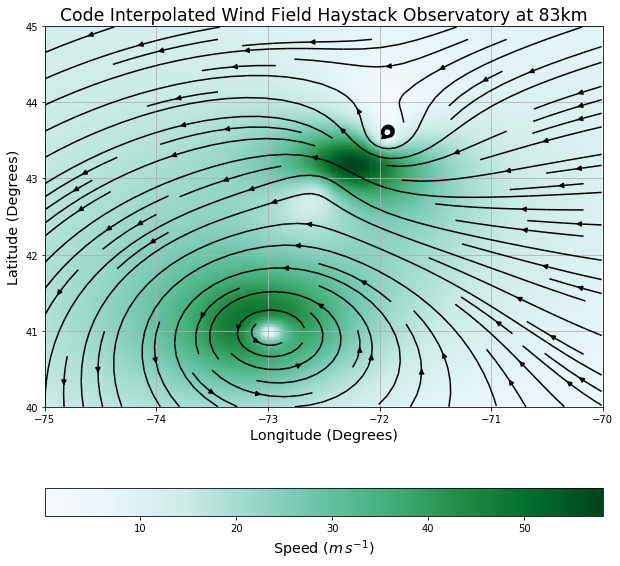

In [80]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 83km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [81]:
np.amax(speedi)

58.19233086205307

In [82]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,1,:]).T # we want altitude 85 km which is second (1) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,1,:]).T
speedi = np.sqrt(ui**2+vi**2)

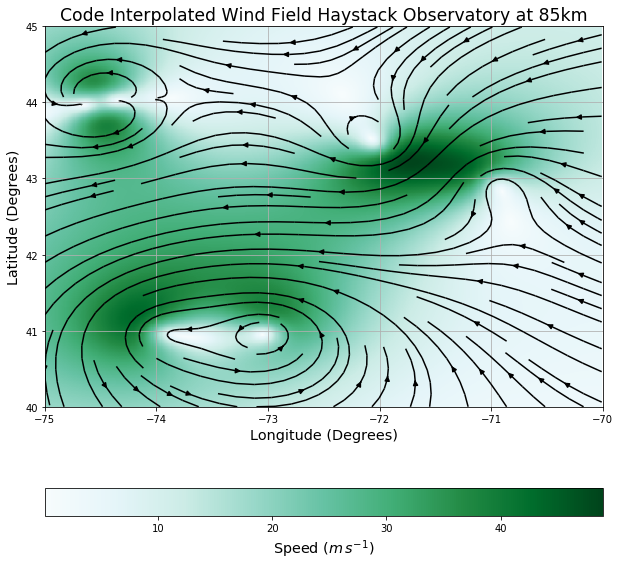

In [83]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 85km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [84]:
np.amax(speedi)

48.962898177375564

In [85]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,2,:]).T # we want altitude 87 km which is third (2) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,2,:]).T 
speedi = np.sqrt(ui**2+vi**2)

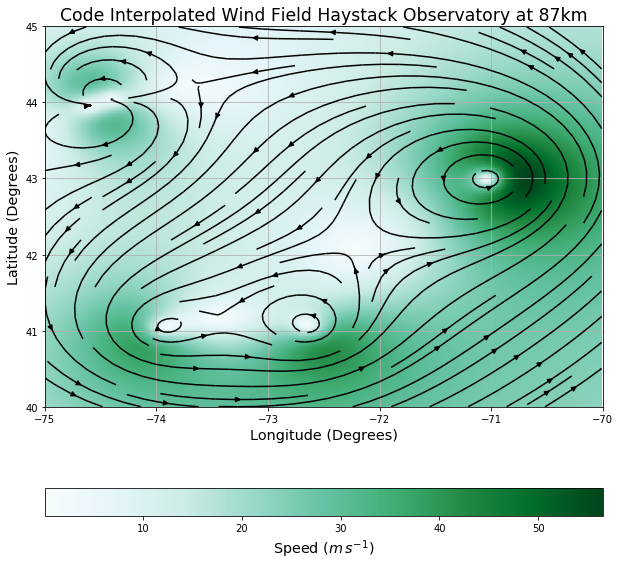

In [86]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 87km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [87]:
np.amax(speedi)

56.56260651373636

In [88]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,3,:]).T # we want altitude 89 km which is fourth (3) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,3,:]).T 
speedi = np.sqrt(ui**2+vi**2)

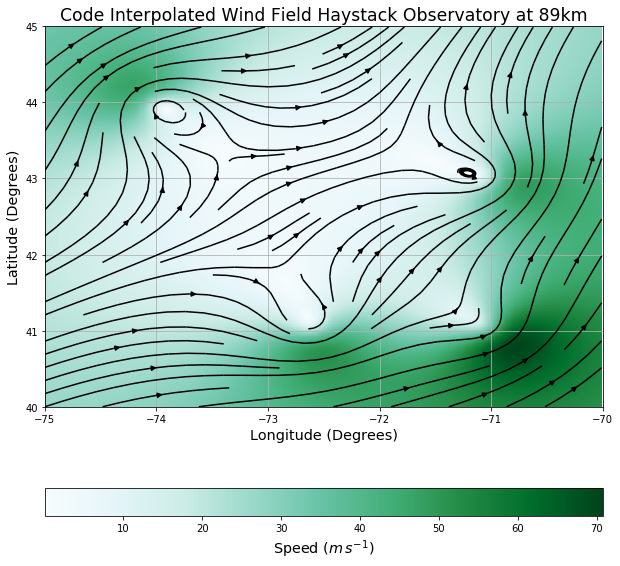

In [89]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 89km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [90]:
np.amax(speedi)

70.76755730060677

In [91]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,4,:]).T # we want altitude 91 km which is fifth (4) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,4,:]).T 
speedi = np.sqrt(ui**2+vi**2)

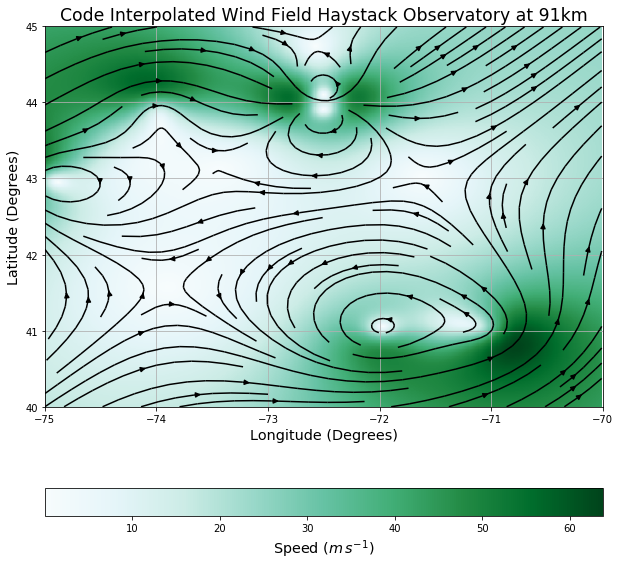

In [92]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 91km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [93]:
np.amax(speedi)

63.761126109341184

In [94]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,5,:]).T # we want altitude 93 km which is sixth (5) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,5,:]).T 
speedi = np.sqrt(ui**2+vi**2)

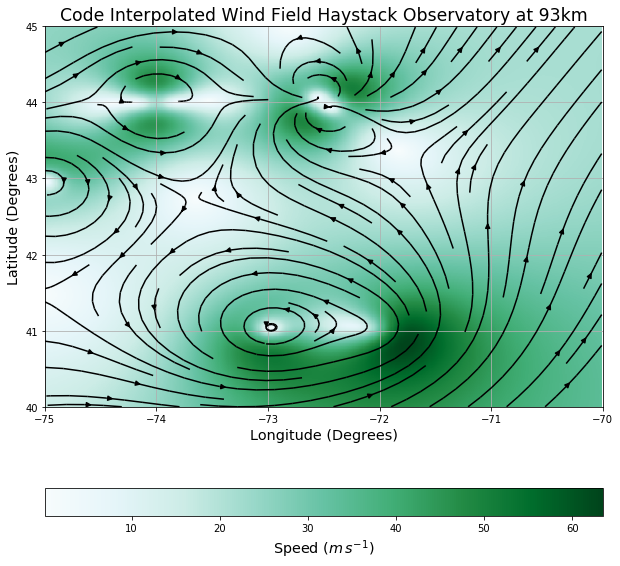

In [95]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 93km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [96]:
np.amax(speedi)

63.490529921974584

In [97]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,6,:]).T # we want altitude 95 km which is seventh (6) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,6,:]).T 
speedi = np.sqrt(ui**2+vi**2)

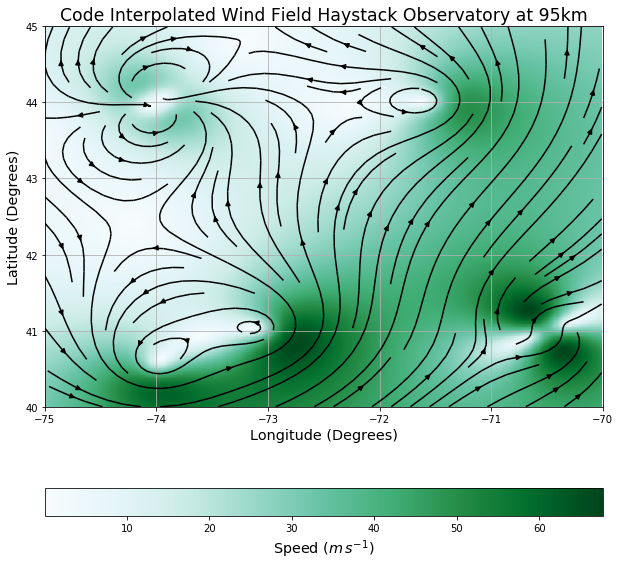

In [98]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 95km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [99]:
np.amax(speedi)

67.73571564691792

In [100]:
from scipy.interpolate import interpn
ui = interpn((x,y,z),u3d,igrid[:,:,7,:]).T # we want altitude 95 km which is eighth (7) in the zi array 
vi = interpn((x,y,z),v3d,igrid[:,:,7,:]).T 
speedi = np.sqrt(ui**2+vi**2)

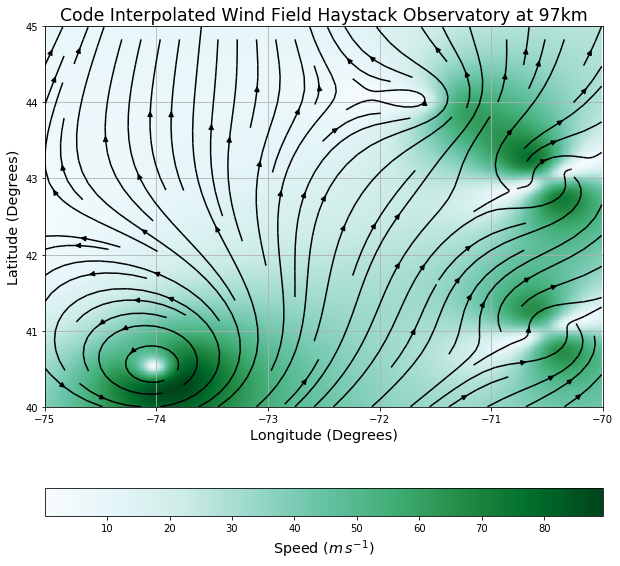

In [101]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speedi, cmap = cmap)

plt.streamplot(x, y, ui, vi, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Code Interpolated Wind Field Haystack Observatory at 97km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [102]:
np.amax(speedi)

89.3959228797652

# Manually Averaging UV1 and UV2 ~ 83km

In [103]:
ah = (UV1 + UV2)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

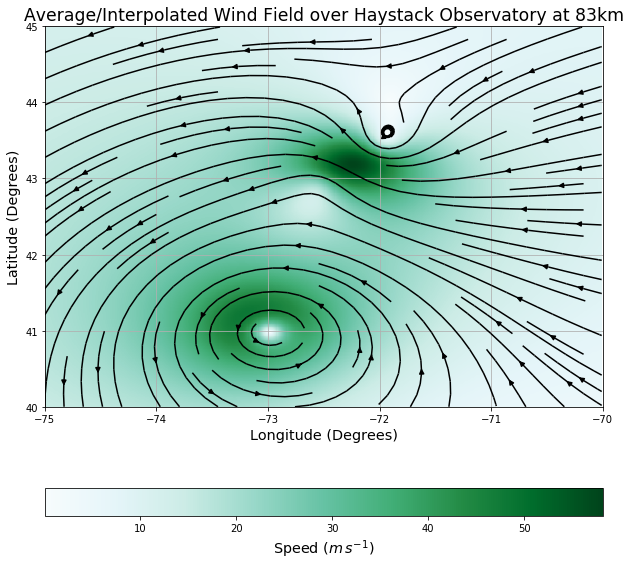

In [104]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 83km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [105]:
np.amax(ahspeed)

58.19233086205307

# Manually Averaging UV2 and UV3 ~ 85km

In [106]:
ah = (UV2 + UV3)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

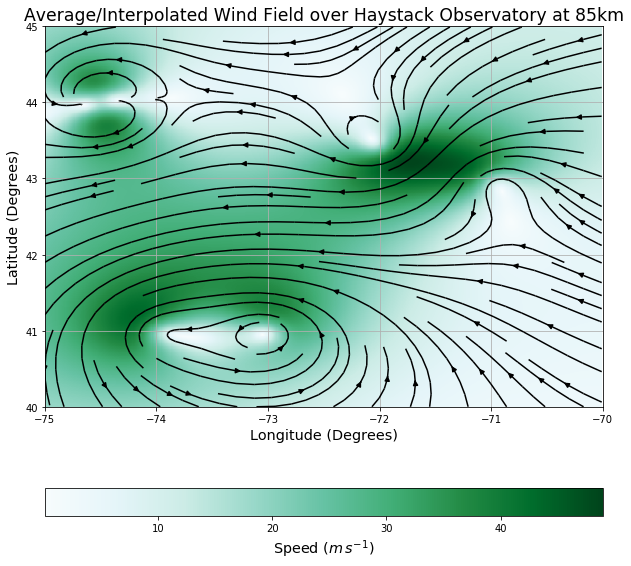

In [107]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 85km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [108]:
np.amax(ahspeed)

48.962898177375564

# Manually Averaging UV3 and UV4 ~ 87km

In [109]:
ah = (UV3 + UV4)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

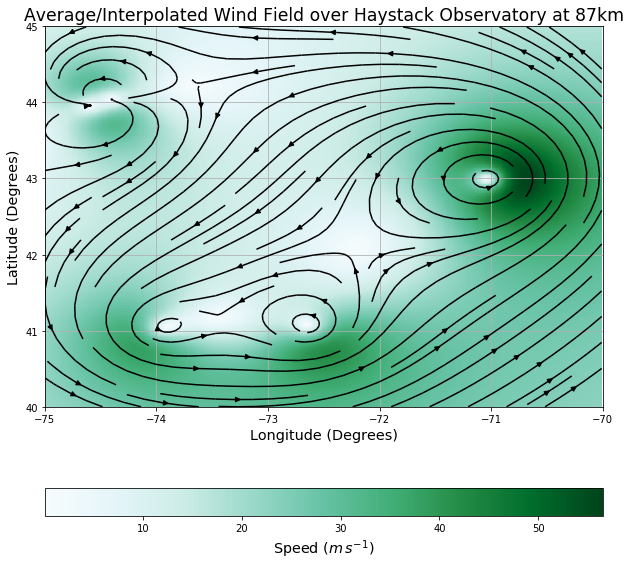

In [110]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 87km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [111]:
np.amax(ahspeed)

56.56260651373636

# Manually Averaging UV4 and UV5 ~ 89km

In [112]:
ah = (UV4 + UV5)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

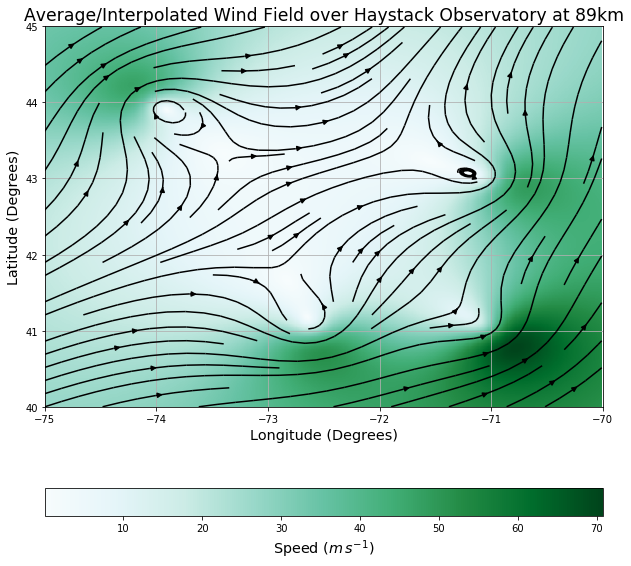

In [113]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 89km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [114]:
np.amax(ahspeed)

70.76755730060677

# Manually Averaging UV5 and UV6 ~ 91km

In [115]:
ah = (UV5 + UV6)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

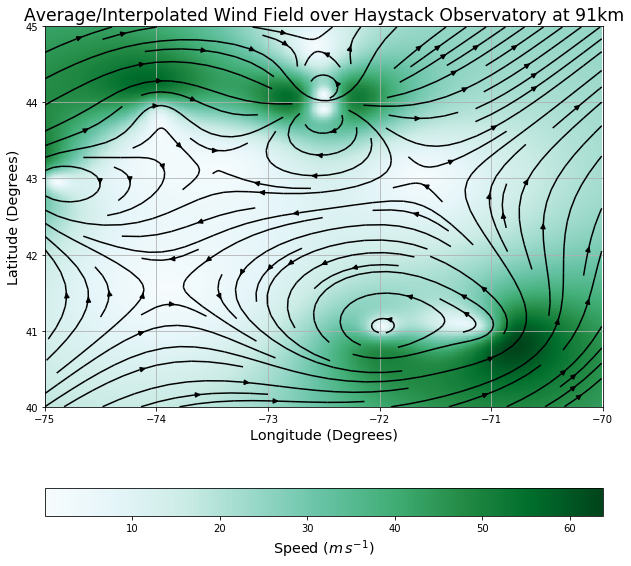

In [116]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 91km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [117]:
np.amax(ahspeed)

63.761126109341184

# Manually Averaging UV6 and UV7 ~ 93km

In [118]:
ah = (UV6 + UV7)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

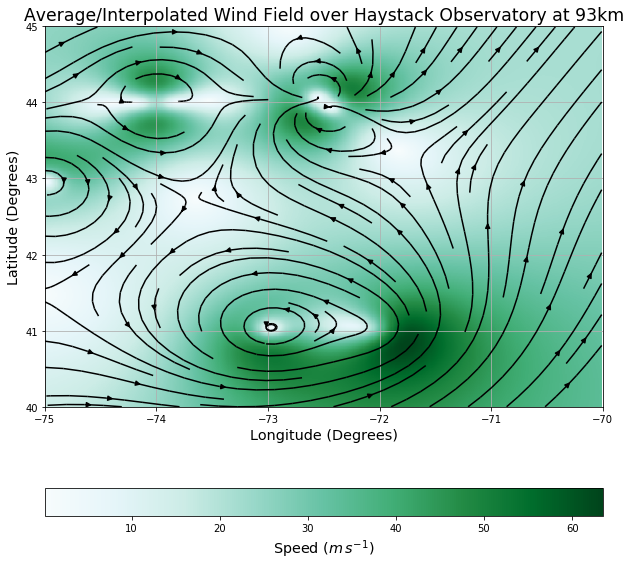

In [119]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 93km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [120]:
np.amax(ahspeed)

63.490529921974584

# Manually Averaging UV7 and UV8 ~ 95km

In [121]:
ah = (UV7 + UV8)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

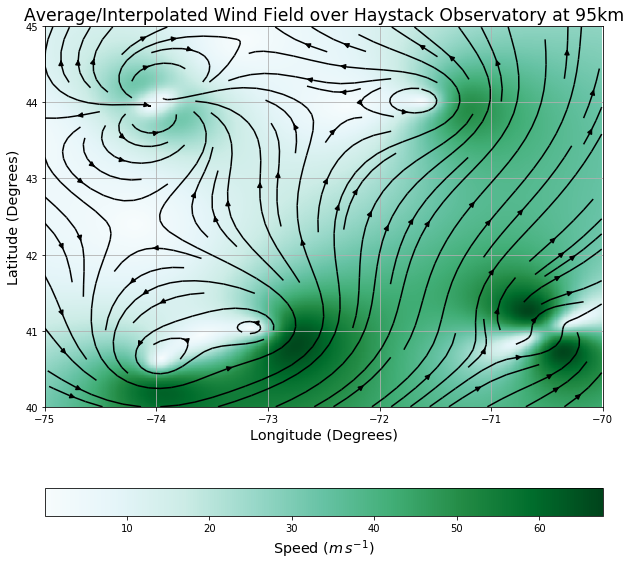

In [122]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 95km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [123]:
np.amax(ahspeed)

67.73571564691792

# Manually Averaging UV8 and UV9 ~ 97km

In [124]:
ah = (UV8 + UV9)/2
uh = ah[...,0]
vh = ah[...,1]
ahspeed = np.sqrt(uh**2+vh**2)

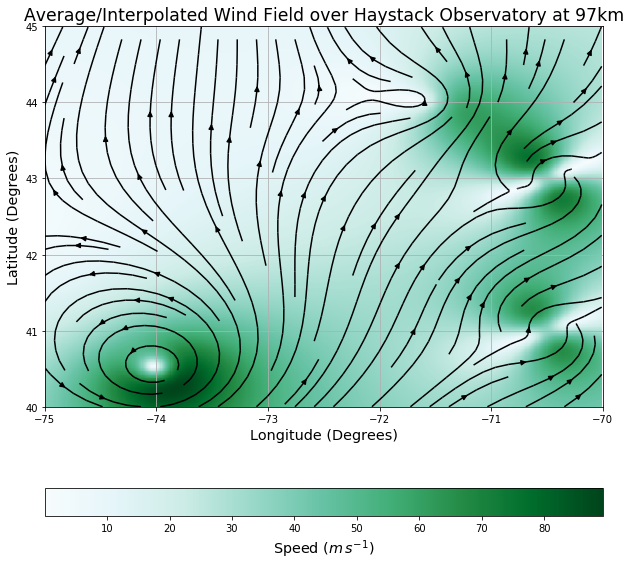

In [125]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, ahspeed, cmap = cmap)

plt.streamplot(x, y, uh, vh, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Average/Interpolated Wind Field over Haystack Observatory at 97km', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [126]:
np.amax(ahspeed)

89.3959228797652